In [1]:
from pdf2image import convert_from_path

In [2]:
pages= convert_from_path(r'C:\Users\Prasanna\Documents\IIT Hyderabad\Python-Proj\Backend\resources\patient_details\pd_2.pdf',poppler_path=r'C:\poppler-22.04.0\Library\bin')

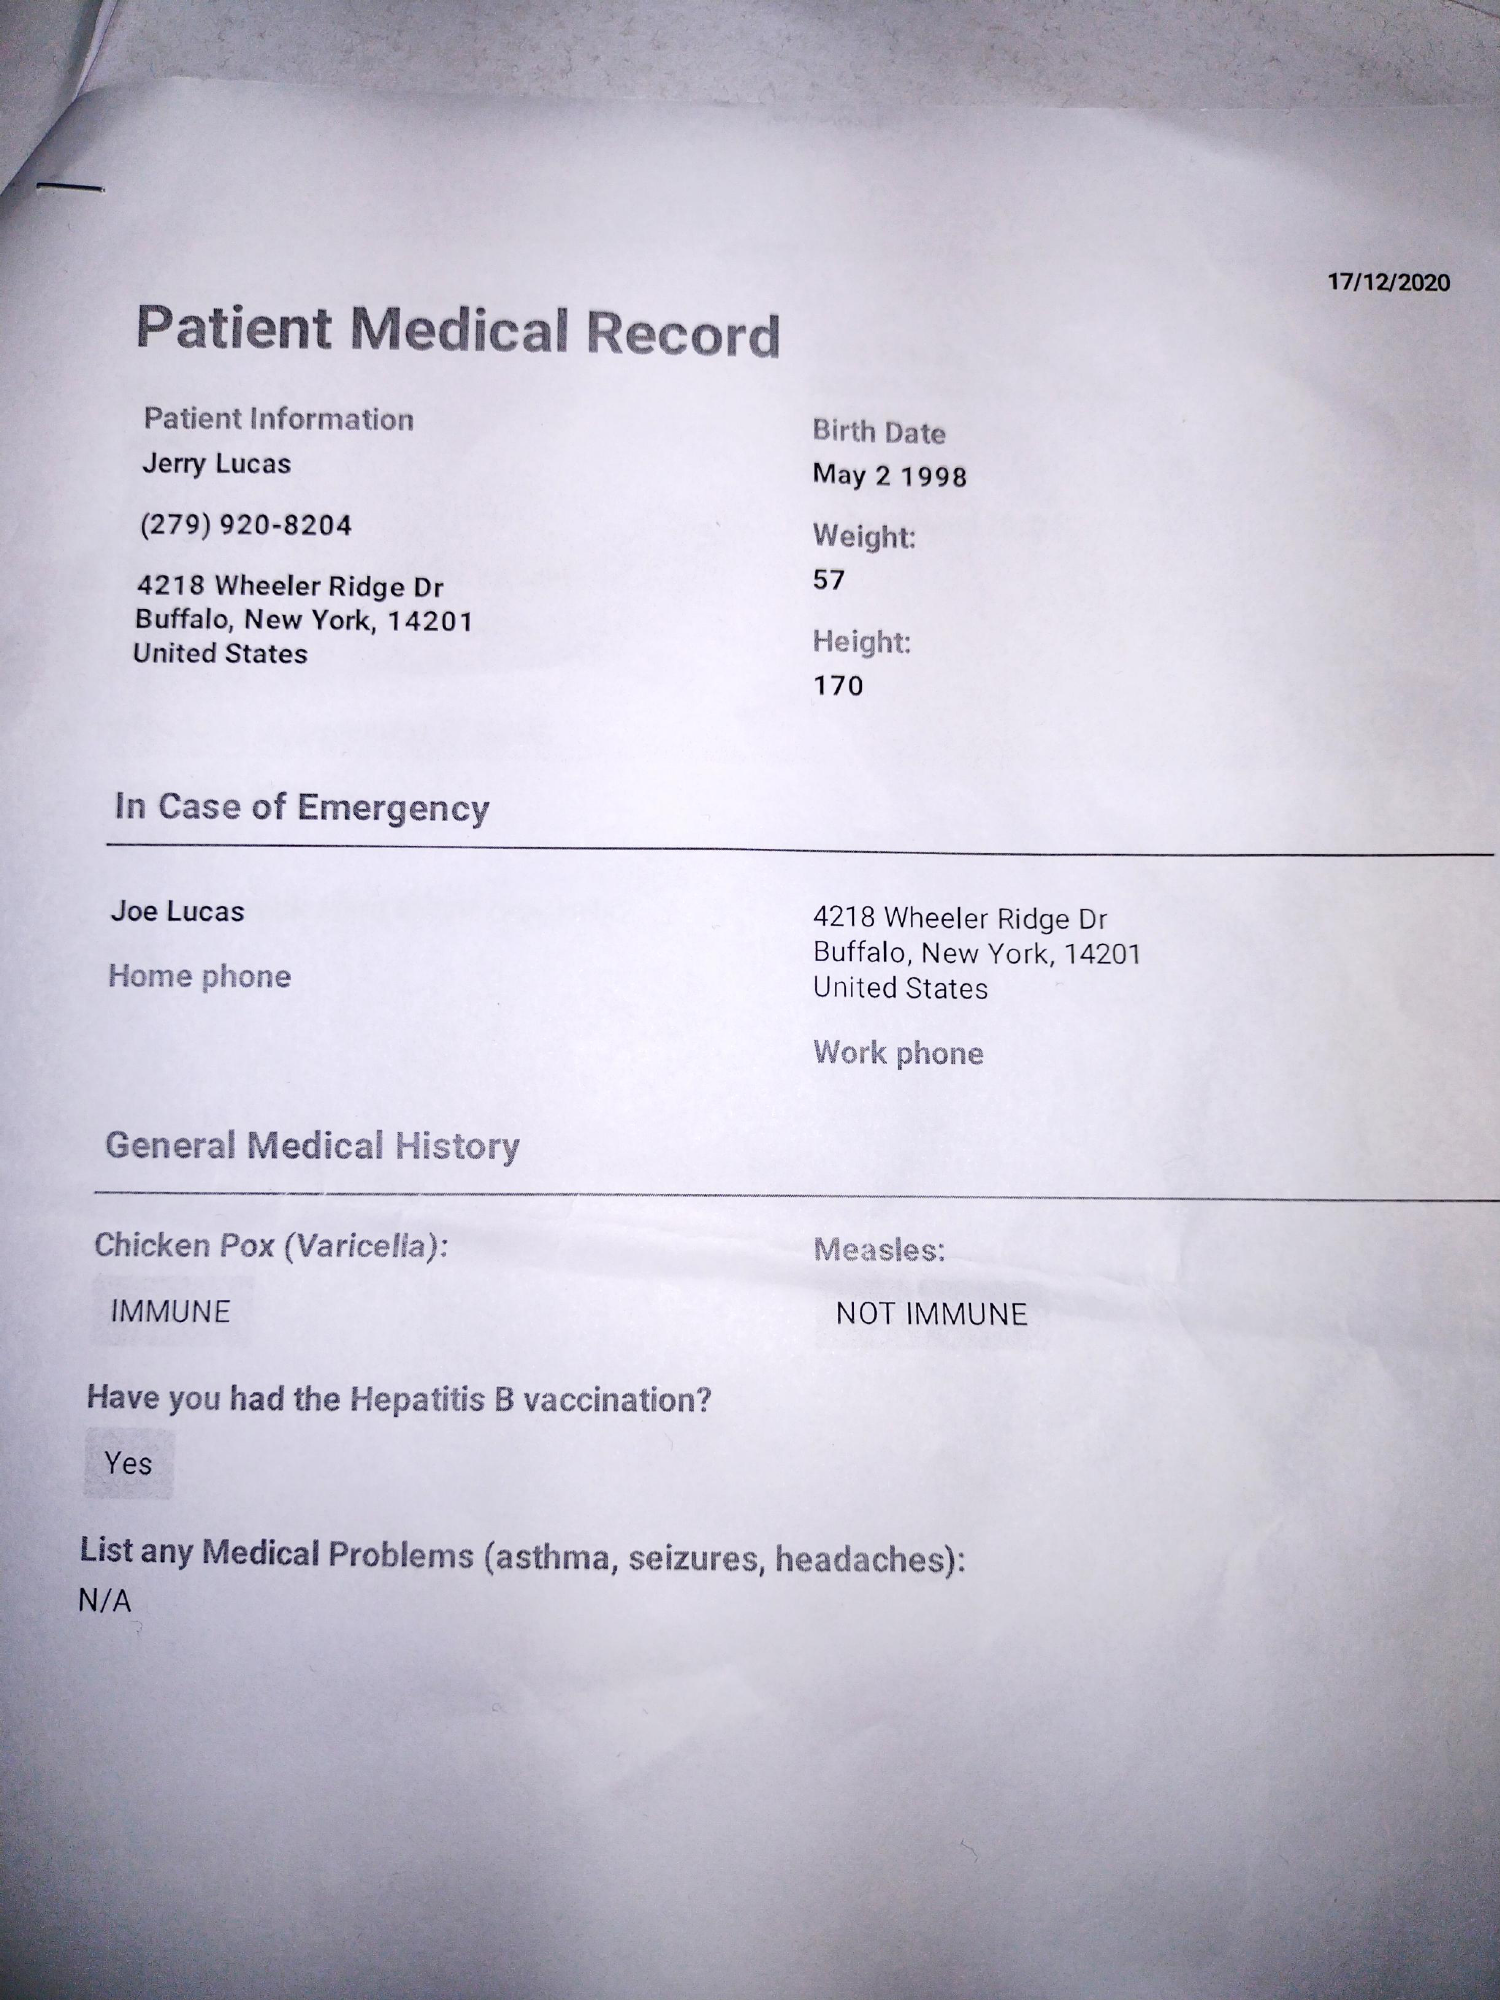

In [3]:
pages[0]

In [4]:
import pytesseract

In [5]:
import numpy as np
import cv2
from PIL import Image


def preprocess_image(img):
    gray_image= cv2.cvtColor(np.array(img),cv2.COLOR_BGR2GRAY) #converting color pic to grayscale
    resized=cv2.resize(gray_image,None,fx=1.5,fy=1.5,interpolation=cv2.INTER_LINEAR) #arguments--> (input size, output size, fx=x axis rescale, fy= y axis rescale, interpolation= fill the empty pixels as a result of interpolation)
    processed_img=cv2.adaptiveThreshold(resized,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,61,11) #apply adaptive thresholding for resized image
    return processed_img

In [6]:
img=preprocess_image(pages[0])
Image.fromarray(img).show()

In [7]:
pytesseract.pytesseract.tesseract_cmd= r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text=pytesseract.image_to_string(img,lang='eng')
print(text)

Patient Medical Record

Patient Information Birth Date

Jerry Lucas May 2 1998

(279) 920-8204 Weight:

4218 Wheeler Ridge Dr 57

Buffalo, New York, 14201 Height:

United States gnt
170

In Case of Emergency

- eee

Joe Lucas . 4218 Wheeler Ridge Dr
Buffalo, New York, 14201
Home phone United States
Work phone

General Medical History

Chicken Pox (Varicelia): Measles: ..

IMMUNE NOT IMMUNE

Have you had the Hepatitis B vaccination?

‘Yes

| List any Medical Problems (asthma, seizures, headaches):
N/A

7?
v

17/12/2020




#### Extract Name

In [27]:
import re

In [28]:
name_filter='Patient Information(.*?)\(\d{3}\)'
phrase=re.findall(name_filter,text,flags=re.DOTALL)
phrase[0].strip()

'Birth Date\n\nJerry Lucas May 2 1998'

In [29]:
name_date=phrase[0].replace("Birth Date","").strip()
name_date

'Jerry Lucas May 2 1998'

In [30]:
pattern = '((Jan|Feb|March|April|May|June|July|Aug|Sep|Oct|Nov|Dec)[ \d]+)'

date_matches = re.findall(pattern, name_date)
date = date_matches[0][0]
date

'May 2 1998'

In [12]:
name_date.replace(date, '').strip()

'Jerry Lucas'

Modular form

In [13]:
text1='''17/12/2020

Patient Medical Record

Patient Information Birth Date

Kathy Crawford May 6 1972

(737) 988-0851 Weight’

9264 Ash Dr 95

New York City, 10005 '

United States Height:
190

In Case of Emergency
ee J
Simeone Crawford 9266 Ash Dr
New York City, New York, 10005
Home phone United States
(990) 375-4621
Work phone
Genera! Medical History
nn ee
Chicken Pox (Varicella): Measies:
IMMUNE

IMMUNE
Have you had the Hepatitis B vaccination?

No

List any Medical Problems (asthma, seizures, headaches}:

Migraine'''

In [19]:
#Putting all the above in a compact function
def remove_noise_for_name(noisy_name):
    name_date=noisy_name[0].replace("Birth Date","").strip()
    pattern = '((Jan|Feb|March|April|May|June|July|Aug|Sep|Oct|Nov|Dec)[ \d]+)'
    date_matches = re.findall(pattern, name_date)
    date = date_matches[0][0]
    final_name=name_date.replace(date, '').strip()
    return final_name

In [26]:
#testing function
name_filter='Patient Information(.*?)\(\d{3}\)'
phrase=re.findall(name_filter,text1,flags=re.DOTALL) #flags = re.DOTALL is put to consider dot as new line
print('phrase:',phrase)
noisy_name=phrase[0].strip()
print('noisy:',noisy_name)
#print(remove_noise_for_name(noisy_name))

phrase: [' Birth Date\n\nKathy Crawford May 6 1972\n\n']
noisy: Birth Date

Kathy Crawford May 6 1972


#### Extract vaccination details

In [16]:
vaccination_filter='Have you had the Hepatitis B vaccination\?.*(Yes|No|yes|no)'
vaccination=re.findall(vaccination_filter,text,flags=re.DOTALL)
vaccination[0]

'Yes'

#### Extracting phone number

In [17]:
phone_filter='Patient Information(.*?)(\(\d{3}\).\d{3}-\d{4})'
phone_no=re.findall(phone_filter,text,flags=re.DOTALL)
phone_no[0][1].strip()

'(279) 920-8204'

#### Extracting medical problem

In [18]:
medprob_filter='List any Medical Problems \(asthma, seizures, headaches(\}|\)):(.*)'
medprob=re.findall(medprob_filter,text,flags=re.DOTALL)
medprob[0][1].strip()

'N/A\n\n7?\nv\n\n17/12/2020'